<a href="https://colab.research.google.com/github/RuslanMamedov/ANN_Heart_Disease_Prediction/blob/master/Chapter_03_FlightDelays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Delay Prediction
#### CHAPTER 03: _Interpretation Challenges_
##### From **[Interpretable Machine Learning with Python](https://www.packtpub.com/product/interpretable-machine-learning-with-python/9781800203907)** by Serg Masís, published by Packt

## The Preparations

### Installing the Libraries

These are all already installed on Google Colab by default so install only if running elsewhere (and ***not already installed***):

In [1]:
!pip install --upgrade pandas numpy scikit-learn==0.24.1 matplotlib==3.1.3 seaborn six tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 119 kB/s 
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached tensorflow-2.10.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (578.0 MB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
     |████████████████████████████████| 123 kB 57.0 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.15.0
    Uninstalling absl-py-0.15.0:
      Successfully uninstalled absl-py-0.15.0
  Attempting uninstall: ten

Install these if running on Google Colab or ***not already installed***:

In [2]:
!pip install --upgrade machine-learning-datasets
!pip install --upgrade rulefit interpret skope-rules
!pip install --no-deps git+https://github.com/maxfrenzel/CompressionVAE.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached machine_learning_datasets-0.1.16.4-py3-none-any.whl (25 kB)
  Using cached statsmodels-0.10.2-cp37-cp37m-manylinux1_x86_64.whl (8.1 MB)
  Using cached aif360-0.3.0-py3-none-any.whl (165 kB)
  Using cached pathlib2-2.3.7.post1-py2.py3-none-any.whl (18 kB)
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached alibi-0.5.8-py3-none-any.whl (312 kB)
  Using cached scikit_learn-0.22.2.post1-cp37-cp37m-manylinux1_x86_64.whl (7.1 MB)
  Using cached pycebox-0.0.1-py3-none-any.whl
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached attrs-20.3.0-py2.py3-none-any.whl (49 kB)
  Using cached tensorflow-2.4.4-cp37-cp37m-manylinux2010_x86_64.whl (394.5 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached six-1.15.0-py2.py3-none-any.w

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/maxfrenzel/CompressionVAE.git to /tmp/pip-req-build-31hwganb
  Running command git clone -q https://github.com/maxfrenzel/CompressionVAE.git /tmp/pip-req-build-31hwganb
  Created wheel for cvae: filename=cvae-0.0.3-py3-none-any.whl size=24597 sha256=3d0f36bbf77503065e14c3ab8f45ea18e195e06dcaeed5d7a528b652d144bb3a
  Stored in directory: /tmp/pip-ephem-wheel-cache-r07weo_3/wheels/43/48/ca/723d503fe280e78457b971a234180dfee750c137374e60bb44
Successfully built cvae


### Loading the Libraries

In [3]:
import math
import machine_learning_datasets as mldatasets
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model, tree, naive_bayes, neighbors, ensemble,\
                    neural_network, svm, decomposition, manifold
from rulefit import RuleFit
import statsmodels.api as sm
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from interpret.perf import ROC
import matplotlib.pyplot as plt
import seaborn as sns

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [4]:
import sys
#Next two lines of code only needed while CVAE 
#remains incompatible to Tensorflow 2.2+
import tensorflow.compat.v1 as tf
sys.modules['tensorflow'] = tf
from cvae import cvae
#Next two lines of code only needed while SkopedRules
#remains incompatible to Sklearn 0.23.0+
import six
sys.modules['sklearn.externals.six'] = six
from skrules import SkopeRules

### Understanding and Preparing the Data

In [5]:
aad18_df = mldatasets.load("aa-domestic-delays-2018")

https://github.com/PacktPublishing/Interpretable-Machine-Learning-with-Python/raw/master/datasets/aa-domestic-delays-2018.csv.zip downloaded to /content/data/aa-domestic-delays-2018.csv.zip
/content/data/aa-domestic-delays-2018.csv.zip uncompressed to /content/data/aa-domestic-delays-2018.csv
1 dataset files found in /content/data/aa-domestic-delays-2018.csv folder
parsing /content/data/aa-domestic-delays-2018.csv/aa-domestic-delays-2018.csv


In [6]:
aad18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899527 entries, 0 to 899526
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   FL_NUM                899527 non-null  int64  
 1   ORIGIN                899527 non-null  object 
 2   DEST                  899527 non-null  object 
 3   PLANNED_DEP_DATETIME  899527 non-null  object 
 4   CRS_DEP_TIME          899527 non-null  int64  
 5   DEP_TIME              899527 non-null  float64
 6   DEP_DELAY             899527 non-null  float64
 7   DEP_AFPH              899527 non-null  float64
 8   DEP_RFPH              899527 non-null  float64
 9   TAXI_OUT              899527 non-null  float64
 10  WHEELS_OFF            899527 non-null  float64
 11  CRS_ELAPSED_TIME      899527 non-null  float64
 12  PCT_ELAPSED_TIME      899527 non-null  float64
 13  DISTANCE              899527 non-null  float64
 14  CRS_ARR_TIME          899527 non-null  int64  
 15  

#### Data Preparation

In [7]:
aad18_df['PLANNED_DEP_DATETIME'] = pd.to_datetime(aad18_df['PLANNED_DEP_DATETIME'])

In [8]:
aad18_df['DEP_MONTH'] = aad18_df['PLANNED_DEP_DATETIME'].dt.month
aad18_df['DEP_DOW'] = aad18_df['PLANNED_DEP_DATETIME'].dt.dayofweek

In [9]:
aad18_df = aad18_df.drop(['PLANNED_DEP_DATETIME'], axis=1)

In [10]:
#Create list with 10 hubs
hubs = ['CLT', 'ORD', 'DFW', 'LAX', 'MIA', 'JFK', 'LGA', 'PHL', 'PHX', 'DCA']
#Boolean series for if ORIGIN or DEST are hubs
is_origin_hub = aad18_df['ORIGIN'].isin(hubs)
is_dest_hub = aad18_df['DEST'].isin(hubs)
#Use boolean series to set ORIGIN_HUB and DEST_HUB
aad18_df['ORIGIN_HUB'] = 0
aad18_df.loc[is_origin_hub, 'ORIGIN_HUB'] = 1
aad18_df['DEST_HUB'] = 0
aad18_df.loc[is_dest_hub, 'DEST_HUB'] = 1
#Delete columns with codes
aad18_df = aad18_df.drop(['FL_NUM', 'ORIGIN', 'DEST'], axis=1)

In [11]:
aad18_df.loc[aad18_df['ARR_DELAY'] > 15, ['ARR_DELAY','CARRIER_DELAY']].head(10)

,ARR_DELAY,CARRIER_DELAY
8,168.0,136.0
16,20.0,5.0
18,242.0,242.0
19,62.0,62.0
22,19.0,19.0
26,26.0,0.0
29,77.0,77.0
32,19.0,19.0
33,18.0,1.0
40,36.0,16.0


In [12]:
aad18_df = aad18_df.drop(['ARR_DELAY'], axis=1)

In [13]:
rand = 9
y = aad18_df['CARRIER_DELAY']
X = aad18_df.drop(['CARRIER_DELAY'], axis=1).copy()
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.15, random_state=rand)
y_train_class = y_train_reg.apply(lambda x: 1 if x > 15 else 0)
y_test_class = y_test_reg.apply(lambda x: 1 if x > 15 else 0)

In [14]:
corr = aad18_df.corr()
abs(corr['CARRIER_DELAY']).sort_values(ascending=False)

CARRIER_DELAY          1.000000
DEP_DELAY              0.703935
ARR_RFPH               0.101742
LATE_AIRCRAFT_DELAY    0.083166
DEP_RFPH               0.058659
ARR_AFPH               0.035135
DEP_TIME               0.030941
NAS_DELAY              0.026792
WHEELS_OFF             0.026787
TAXI_OUT               0.024635
PCT_ELAPSED_TIME       0.020980
CRS_DEP_TIME           0.016032
ORIGIN_HUB             0.015334
DEST_HUB               0.013932
DISTANCE               0.010680
DEP_MONTH              0.009728
CRS_ELAPSED_TIME       0.008801
DEP_DOW                0.007043
CRS_ARR_TIME           0.007029
DEP_AFPH               0.006053
WEATHER_DELAY          0.003002
SECURITY_DELAY         0.000460
Name: CARRIER_DELAY, dtype: float64

## Reviewing Traditional Model Interpretation Methods

### Predicting Minutes Delayed with Various Regression Methods

#### Training and Evaluating the Regression Models

In [15]:
reg_models = {
        #Generalized Linear Models (GLMs)
        'linear':{'model': linear_model.LinearRegression()}, 
        'linear_poly':{'model': make_pipeline(PolynomialFeatures(degree=2),
                              linear_model.LinearRegression(fit_intercept=False)) },
        'linear_interact':{'model': make_pipeline(PolynomialFeatures(interaction_only=True),
                              linear_model.LinearRegression(fit_intercept=False)) },
        'ridge':{'model': linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]) }, 
        #Trees  
        'decision_tree':{'model': tree.DecisionTreeRegressor(max_depth=7, random_state=rand)},
        #RuleFit
        'rulefit':{'model': RuleFit(max_rules=150, rfmode='regress', random_state=rand)}, 
        #Nearest Neighbors
        'knn':{'model': neighbors.KNeighborsRegressor(n_neighbors=7)}, 
        #Ensemble Methods
        'random_forest':{'model':ensemble.RandomForestRegressor(max_depth=7, random_state=rand)}, 
        #Neural Networks
        'mlp':{'model':neural_network.MLPRegressor(hidden_layer_sizes=(21,), max_iter=500, 
                                                   early_stopping=True, random_state=rand)}
    }

In [16]:
for model_name in reg_models.keys():
    if model_name != 'rulefit':
        fitted_model = reg_models[model_name]['model'].fit(X_train, y_train_reg)
    else:
        fitted_model = reg_models[model_name]['model'].fit(X_train.values, y_train_reg.values, X_test.columns)
    y_train_pred = fitted_model.predict(X_train.values)
    y_test_pred = fitted_model.predict(X_test.values)
    reg_models[model_name]['fitted'] = fitted_model
    reg_models[model_name]['preds'] = y_test_pred
    reg_models[model_name]['RMSE_train'] = math.sqrt(metrics.mean_squared_error(y_train_reg, y_train_pred))
    reg_models[model_name]['RMSE_test'] = math.sqrt(metrics.mean_squared_error(y_test_reg, y_test_pred))
    reg_models[model_name]['R2_test'] = metrics.r2_score(y_test_reg, y_test_pred)

In [17]:
reg_metrics = pd.DataFrame.from_dict(reg_models, 'index')[['RMSE_train', 'RMSE_test', 'R2_test']]
reg_metrics.sort_values(by='RMSE_test').style.\
    background_gradient(cmap='viridis', low=1, high=0.3, subset=['RMSE_train', 'RMSE_test']).\
    background_gradient(cmap='plasma', low=0.3, high=1, subset=['R2_test'])

,RMSE_train,RMSE_test,R2_test
mlp,3.243516,3.308597,0.987025
random_forest,5.143267,6.088249,0.956065
linear_poly,6.213987,6.339854,0.952359
linear_interact,6.454305,6.562285,0.948957
decision_tree,6.542924,7.456335,0.934102
linear,7.819643,7.882875,0.926347
ridge,7.835849,7.898068,0.926062
knn,7.360098,9.259422,0.898377
rulefit,9.171491,9.308906,0.897288


### Classifying Flights as Delayed or Not Delayed with Various Classification Methods

#### Training and Evaluating the Classification Models

In [21]:
class_models = {
        #Generalized Linear Models (GLMs)
        'logistic':{'model': linear_model.LogisticRegression(solver='liblinear')}, 
        'ridge':{'model': linear_model.RidgeClassifierCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 1],\
                                                         class_weight='balanced')},  
        #Tree
        'decision_tree':{'model': tree.DecisionTreeClassifier(max_depth=7, random_state=rand)},
        #Nearest Neighbors
        'knn':{'model': neighbors.KNeighborsClassifier(n_neighbors=7)}, 
        #Naive Bayes
        'naive_bayes':{'model': naive_bayes.GaussianNB()},
        #Ensemble Methods
        'gradient_boosting':{'model':ensemble.GradientBoostingClassifier(n_estimators=210)},
        'random_forest':{'model':ensemble.RandomForestClassifier(max_depth=11,\
                                                                 class_weight='balanced', random_state=rand)},
        #Neural Networks
        'mlp':{'model':make_pipeline(StandardScaler(),\
                                     neural_network.MLPClassifier(hidden_layer_sizes=(7,), max_iter=500,\
                                                   early_stopping=True, random_state=rand))}
    }

In [22]:
print(y_train_class[y_train_class==1].shape[0] / y_train_class.shape[0])

0.061283264255549


In [23]:
for model_name in class_models.keys():
    fitted_model = class_models[model_name]['model'].fit(X_train, y_train_class)
    y_train_pred = fitted_model.predict(X_train.values)
    if model_name == 'ridge':
        y_test_pred = fitted_model.predict(X_test.values) 
    else:
        y_test_prob = fitted_model.predict_proba(X_test.values)[:,1]
        y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
    class_models[model_name]['fitted'] = fitted_model
    class_models[model_name]['probs'] = y_test_prob
    class_models[model_name]['preds'] = y_test_pred
    class_models[model_name]['Accuracy_train'] = metrics.accuracy_score(y_train_class, y_train_pred)
    class_models[model_name]['Accuracy_test'] = metrics.accuracy_score(y_test_class, y_test_pred)
    class_models[model_name]['Recall_train'] = metrics.recall_score(y_train_class, y_train_pred)
    class_models[model_name]['Recall_test'] = metrics.recall_score(y_test_class, y_test_pred)
    if model_name != 'ridge':
        class_models[model_name]['ROC_AUC_test'] = metrics.roc_auc_score(y_test_class, y_test_prob)
    else:
        class_models[model_name]['ROC_AUC_test'] = 0
    class_models[model_name]['F1_test'] = metrics.f1_score(y_test_class, y_test_pred)
    class_models[model_name]['MCC_test'] = metrics.matthews_corrcoef(y_test_class, y_test_pred)

In [24]:
class_metrics = pd.DataFrame.from_dict(class_models, 'index')[['Accuracy_train', 'Accuracy_test',\
                                                               'Recall_train', 'Recall_test',\
                                                               'ROC_AUC_test', 'F1_test', 'MCC_test']]
class_metrics.sort_values(by='ROC_AUC_test', ascending=False).style.\
    background_gradient(cmap='plasma', low=0.3, high=1, subset=['Accuracy_train', 'Accuracy_test']).\
    background_gradient(cmap='viridis', low=1, high=0.3, subset=['Recall_train', 'Recall_test',\
                                                                 'ROC_AUC_test', 'F1_test', 'MCC_test'])

,Accuracy_train,Accuracy_test,Recall_train,Recall_test,ROC_AUC_test,F1_test,MCC_test
mlp,0.998482,0.998555,0.987131,0.988865,0.999877,0.988207,0.987437
gradient_boosting,0.991725,0.991662,0.892930,0.893851,0.998885,0.929223,0.925619
random_forest,0.941840,0.940680,0.999445,0.992617,0.995074,0.672048,0.686955
decision_tree,0.983297,0.982895,0.856969,0.852215,0.994932,0.859182,0.850110
logistic,0.978780,0.978633,0.742344,0.741830,0.973081,0.809590,0.802132
knn,0.972886,0.965123,0.680645,0.607722,0.948387,0.680906,0.668176
naive_bayes,0.925119,0.925539,0.279126,0.274268,0.811869,0.310858,0.274984
ridge,0.890493,0.891240,0.776853,0.778383,0.000000,0.467081,0.463847


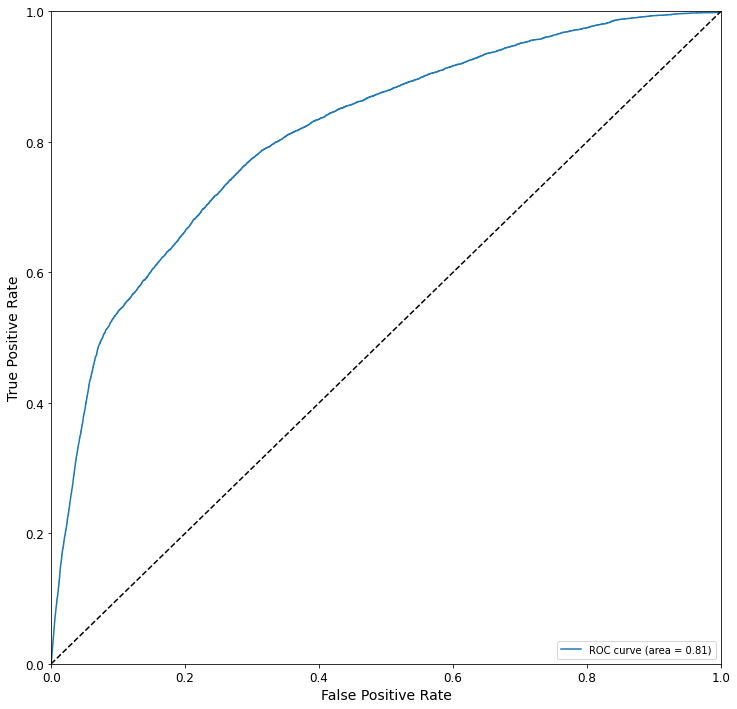

In [25]:
plt.figure(figsize = (12,12))
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
fpr, tpr, _ = metrics.roc_curve(y_test_class, class_models['naive_bayes']['probs'])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % class_models['naive_bayes']['ROC_AUC_test'])
plt.plot([0, 1], [0, 1], 'k--')  # coin toss line
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")

### Visualizing Delayed Flights with Dimensionality Reduction Methods

In [26]:
X_train_abbrev = X_train.iloc[:,[0, 1, 2, 4, 8, 9, 11, 17, 20]]
X_test_abbrev = X_test.iloc[:,[0, 1, 2, 4, 8, 9, 11, 17, 20]]
np.random.seed(rand)
sample_size = 0.1
sample_idx = np.random.choice(X_test.shape[0],\
                              math.ceil(X_test.shape[0]*sample_size), replace=False)

dimred_methods = {
        #Decomposition
        'pca':{'method': decomposition.PCA(n_components=3, random_state=rand)},  
        #Manifold Learning
        't-sne':{'method': manifold.TSNE(n_components=3, random_state=rand)},
        #Variational Autoencoders
        'vae':{'method': cvae.CompressionVAE(X_train_abbrev.values,\
                                             dim_latent=3, tb_logging=False)}, 
    }

Total amount of data:  688137
Input feature dimension:  9
Calculating normalisation factors.
Normalisation factors calculated.
Total amount of data:  76460
Creating model.
Model created.
Setting up loss.
Loss set up.
Setting up session.
Session set up.
Trying to restore saved checkpoints from /content/temp ... No checkpoint found.
No model found to restore. Initialising new model.


In [27]:
for method_name in dimred_methods.keys():
    if method_name != 'vae':
        lowdim_data = dimred_methods[method_name]['method'].\
                        fit_transform(X_test_abbrev.values[sample_idx])
    else:
        fitted_model = dimred_methods[method_name]['method'].train(num_steps=1000)
        lowdim_data = fitted_model.embed(X_test_abbrev.values[sample_idx])
        dimred_methods[method_name]['fitted'] = fitted_model
    dimred_methods[method_name]['lowdim'] = lowdim_data

Starting queues.
Reader threads started.
step 0; epoch 0.00 - loss = 9.415, test_loss = 7.859, lr = 0.00100, (0.187 sec/step)
Storing checkpoint to /content/temp ... Done.
step 50; epoch 0.00 - loss = 5.313, test_loss = 6.287, lr = 0.00100, (0.149 sec/step)
step 100; epoch 0.01 - loss = 4.133, test_loss = 5.087, lr = 0.00100, (0.132 sec/step)
step 150; epoch 0.01 - loss = 4.031, test_loss = 4.889, lr = 0.00100, (0.148 sec/step)
step 200; epoch 0.02 - loss = 4.217, test_loss = 4.791, lr = 0.00100, (0.181 sec/step)
step 250; epoch 0.02 - loss = 3.762, test_loss = 4.740, lr = 0.00100, (0.146 sec/step)
step 300; epoch 0.03 - loss = 4.323, test_loss = 4.711, lr = 0.00100, (0.139 sec/step)
step 350; epoch 0.03 - loss = 4.416, test_loss = 4.700, lr = 0.00100, (0.133 sec/step)
step 400; epoch 0.04 - loss = 4.211, test_loss = 4.702, lr = 0.00100, (0.138 sec/step)
step 450; epoch 0.04 - loss = 4.198, test_loss = 4.701, lr = 0.00100, (0.135 sec/step)
step 500; epoch 0.05 - loss = 3.878, test_loss

In [28]:
y_names = {0:'Not Delayed', 1:'Delayed'}

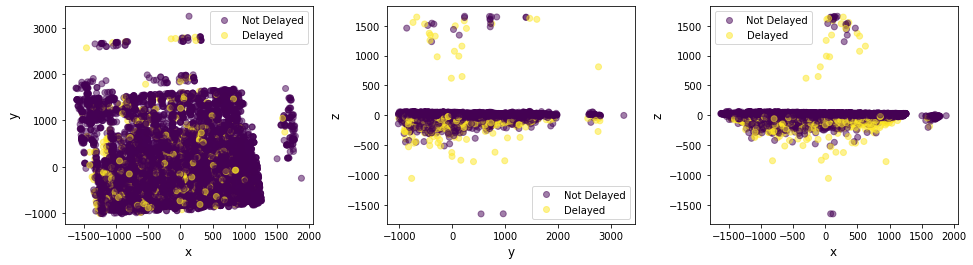

In [30]:
mldatasets.plot_3dim_decomposition(dimred_methods['pca']['lowdim'],\
                        y_test_class.values[sample_idx], y_names)

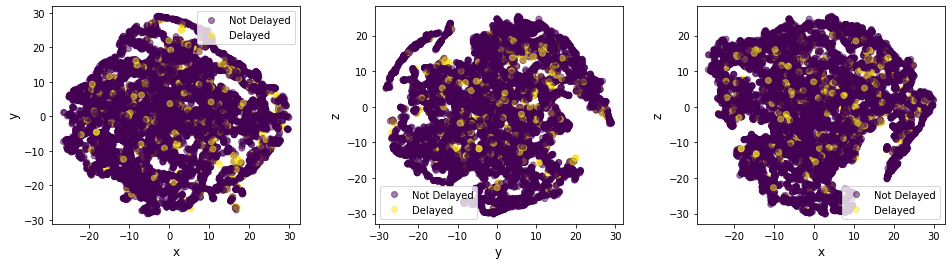

In [31]:
mldatasets.plot_3dim_decomposition(dimred_methods['t-sne']['lowdim'],\
                        y_test_class.values[sample_idx], y_names)

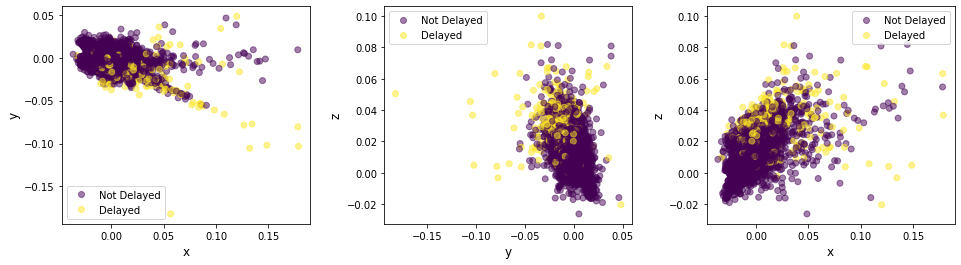

In [32]:
mldatasets.plot_3dim_decomposition(dimred_methods['vae']['lowdim'],\
                        y_test_class.values[sample_idx], y_names)

In [33]:
y_test_class_samp = y_test_class.values[sample_idx]
y_test_pred_samp = class_models['ridge']['preds'][sample_idx]
error_vector, error_labels = mldatasets.encode_classification_error_vector(y_test_class_samp, y_test_pred_samp)

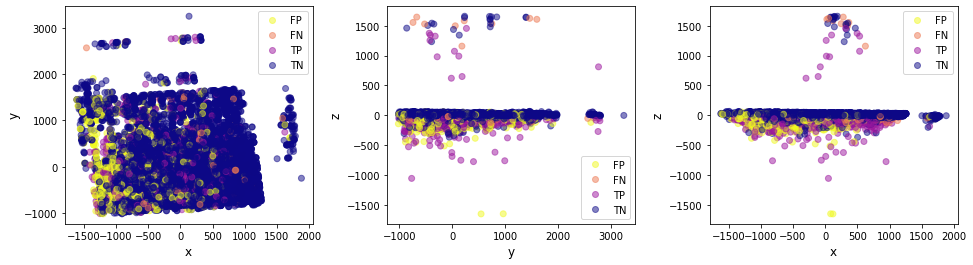

In [34]:
mldatasets.plot_3dim_decomposition(dimred_methods['pca']['lowdim'],\
                        error_vector, error_labels)

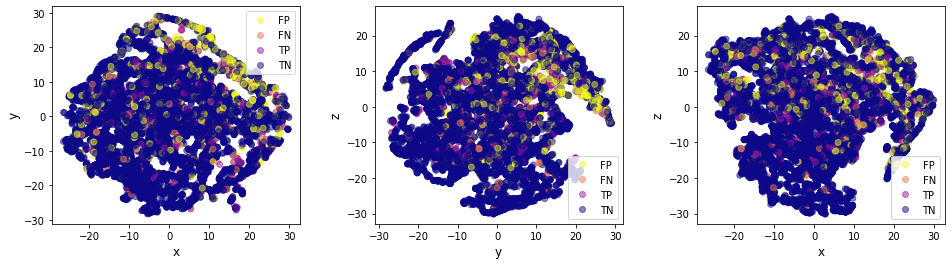

In [35]:
mldatasets.plot_3dim_decomposition(dimred_methods['t-sne']['lowdim'],\
                        error_vector, error_labels)

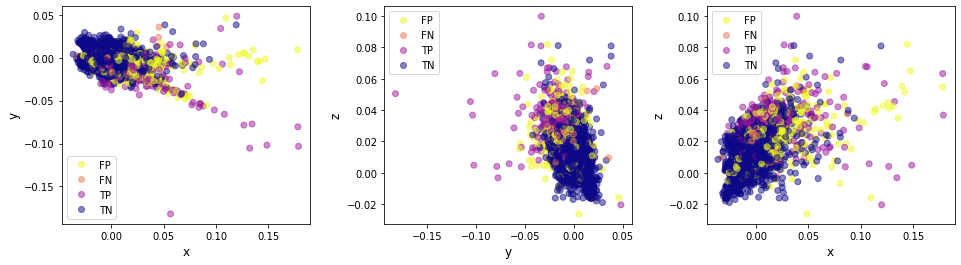

In [36]:
mldatasets.plot_3dim_decomposition(dimred_methods['vae']['lowdim'],\
                        error_vector, error_labels)

## Studying Intrinsically interpretable (White-box) models

### Generalized Linear Models (GLMs)

#### Linear Regression

In [37]:
coefs_lm = reg_models['linear']['fitted'].coef_
intercept_lm = reg_models['linear']['fitted'].intercept_
print('coefficients:\t%s' % coefs_lm)
print('intercept:\t%s' % intercept_lm)

coefficients:	[ 4.54984539e-03 -5.25067742e-03  8.94125541e-01 -1.52961053e-02
 -4.69623002e-01  1.25277815e-01 -6.46744472e-04 -1.26240049e-02
  4.50112895e+01  6.76385421e-04 -3.69920254e-04  5.47855860e-04
  3.73866548e-01 -9.06364154e-01 -6.74052666e-01 -9.17411191e-01
 -9.29843952e-01 -3.96621856e-02 -1.79666480e-02 -1.02912927e+00
 -3.94934854e-01]
intercept:	-37.861779327525724


In [38]:
print('ŷ = %0.2f + %0.4fX₁ + %0.4fX₂ + %0.3fX₃ + ...' %\
      (intercept_lm, coefs_lm[0], coefs_lm[1], coefs_lm[2]))

ŷ = -37.86 + 0.0045X₁ + -0.0053X₂ + 0.894X₃ + ...


In [39]:
coef_df = pd.DataFrame({'feature':X_train.columns.values.tolist(),\
                        'coef': coefs_lm})
print(coef_df)

                feature       coef
0          CRS_DEP_TIME   0.004550
1              DEP_TIME  -0.005251
2             DEP_DELAY   0.894126
3              DEP_AFPH  -0.015296
4              DEP_RFPH  -0.469623
5              TAXI_OUT   0.125278
6            WHEELS_OFF  -0.000647
7      CRS_ELAPSED_TIME  -0.012624
8      PCT_ELAPSED_TIME  45.011289
9              DISTANCE   0.000676
10         CRS_ARR_TIME  -0.000370
11             ARR_AFPH   0.000548
12             ARR_RFPH   0.373867
13        WEATHER_DELAY  -0.906364
14            NAS_DELAY  -0.674053
15       SECURITY_DELAY  -0.917411
16  LATE_AIRCRAFT_DELAY  -0.929844
17            DEP_MONTH  -0.039662
18              DEP_DOW  -0.017967
19           ORIGIN_HUB  -1.029129
20             DEST_HUB  -0.394935


In [40]:
linreg_mdl = sm.OLS(y_train_reg, sm.add_constant(X_train))
linreg_mdl = linreg_mdl.fit()
linreg_mdl.summary()

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CARRIER_DELAY   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 4.251e+05
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:29:31   Log-Likelihood:            -2.6574e+06
No. Observations:              764597   AIC:                         5.315e+06
Df Residuals:                  764575   BIC:                         5.315e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -37.8618      0.125   -301.763      0.000     -38.108     -37.616
CRS_DEP_TIME            0.0045   7.24e-05     62.872      0.000       0.004       0.005
DEP_TIME               -0.0053   9.19e-05    -57.116      0.000      -0.005      -0.005
DEP_DELAY               0.8941      0.000   2951.056      0.000       0.894       0.895
DEP_AFPH               -0.0153      0.000    -47.725      0.000      -0.016      -0.015
DEP_RFPH               -0.4696      0.017    -27.353      0.000      -0.503      -0.436
TAXI_OUT                0.1253      0.001    104.120      0.000       0.123       0.128
WHEELS_OFF             -0.0006    6.7e-05     -9.646      0.000      -0.001      -0.001
CRS_ELAPSED_TIME       -0.0126      0.001    -19.132      0.000      -0.014      -0.011
PCT_ELAPSED_TIME       45.0113      0.117    384.073      0.000      44.782      45.241
DISTANCE                0.0007   8.02e-05      8.429      0.000       0.001       0.001
CRS_ARR_TIME           -0.0004   2.18e-05    -16.939      0.000      -0.000      -0.000
ARR_AFPH                0.0005      0.000      1.651      0.099      -0.000       0.001
ARR_RFPH                0.3739      0.013     28.386      0.000       0.348       0.400
WEATHER_DELAY          -0.9064      0.001   -995.366      0.000      -0.908      -0.905
NAS_DELAY              -0.6741      0.001   -829.129      0.000      -0.676      -0.672
SECURITY_DELAY         -0.9174      0.005   -167.857      0.000      -0.928      -0.907
LATE_AIRCRAFT_DELAY    -0.9298      0.001  -1827.018      0.000      -0.931      -0.929
DEP_MONTH              -0.0397      0.003    -15.019      0.000      -0.045      -0.034
DEP_DOW                -0.0180      0.004     -4.005      0.000      -0.027      -0.009
ORIGIN_HUB             -1.0291      0.027    -38.589      0.000      -1.081      -0.977
DEST_HUB               -0.3949      0.026    -15.041      0.000      -0.446      -0.343
==============================================================================
Omnibus:                   211121.387   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24359701.834
Skew:                           0.098   Prob(JB):                         0.00
Kurtosis:                      30.651   Cond. No.                     5.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
summary_df = linreg_mdl.summary2().tables[1]
summary_df = summary_df.drop(['const']).reset_index().rename(columns={'index':'feature'})
summary_df['t_abs'] = abs(summary_df['t'])
summary_df.sort_values(by='t_abs', ascending=False).style.\
    background_gradient(cmap='plasma_r', low=0, high=0.1, subset=['P>|t|']).\
    background_gradient(cmap='plasma_r', low=0, high=0.1, subset=['t_abs'])

,feature,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],t_abs
2,DEP_DELAY,0.894126,0.000303,2951.055978,0.000000,0.893532,0.894719,2951.055978
16,LATE_AIRCRAFT_DELAY,-0.929844,0.000509,-1827.018082,0.000000,-0.930841,-0.928846,1827.018082
13,WEATHER_DELAY,-0.906364,0.000911,-995.366423,0.000000,-0.908149,-0.904579,995.366423
14,NAS_DELAY,-0.674053,0.000813,-829.128657,0.000000,-0.675646,-0.672459,829.128657
8,PCT_ELAPSED_TIME,45.011289,0.117195,384.072566,0.000000,44.781592,45.240987,384.072566
15,SECURITY_DELAY,-0.917411,0.005465,-167.857085,0.000000,-0.928123,-0.906699,167.857085
5,TAXI_OUT,0.125278,0.001203,104.119579,0.000000,0.122920,0.127636,104.119579
0,CRS_DEP_TIME,0.004550,0.000072,62.871693,0.000000,0.004408,0.004692,62.871693
1,DEP_TIME,-0.005251,0.000092,-57.115895,0.000000,-0.005431,-0.005070,57.115895
3,DEP_AFPH,-0.015296,0.000321,-47.724506,0.000000,-0.015924,-0.014668,47.724506


#### Ridge Regression

In [42]:
coefs_ridge = reg_models['ridge']['fitted'].coef_
coef_ridge_df = pd.DataFrame({'feature':X_train.columns.values.tolist(),\
                        'coef_linear': coefs_lm,\
                        'coef_ridge': coefs_ridge})
coef_ridge_df.style.\
    background_gradient(cmap='viridis_r', low=0.3, high=0.2, axis=1)

,feature,coef_linear,coef_ridge
0,CRS_DEP_TIME,0.004550,0.004574
1,DEP_TIME,-0.005251,-0.004836
2,DEP_DELAY,0.894126,0.892207
3,DEP_AFPH,-0.015296,-0.015178
4,DEP_RFPH,-0.469623,-0.469627
5,TAXI_OUT,0.125278,0.125172
6,WHEELS_OFF,-0.000647,0.000063
7,CRS_ELAPSED_TIME,-0.012624,-0.012656
8,PCT_ELAPSED_TIME,45.011289,45.011278
9,DISTANCE,0.000676,0.000389


In [43]:
num_alphas = 100
alphas = np.logspace(0, 13, num_alphas)
alphas_coefs = []
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha).fit(X_train, y_train_reg)
    alphas_coefs.append(np.concatenate((ridge.coef_[:8],ridge.coef_[9:])))

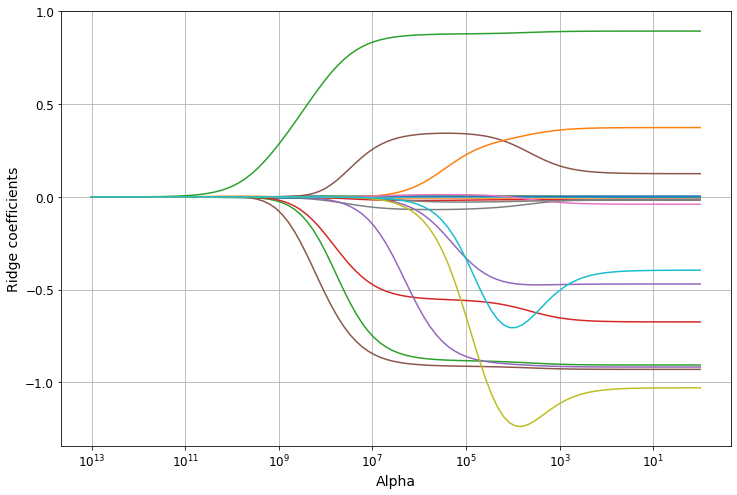

In [44]:
plt.figure(figsize = (12,8))
plt.gca().invert_xaxis()
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.plot(alphas, alphas_coefs)
plt.xscale("log")
plt.xlabel('Alpha', fontsize = 14)
plt.ylabel('Ridge coefficients', fontsize = 14)
plt.grid()
plt.show()

#### Polynomial Regression

In [45]:
print(reg_models['linear_poly']['fitted'].get_params()['linearregression'].coef_.shape[0])

253


In [46]:
print(reg_models['linear_interact']['fitted'].get_params()['linearregression'].coef_.shape[0])

232


#### Logistic Regression

In [47]:
coefs_log = class_models['logistic']['fitted'].coef_
intercept_log = class_models['logistic']['fitted'].intercept_
print('coefficients:\t%s' % coefs_log)
print('intercept:\t%s' % intercept_log)

coefficients:	[[-4.14278959e-04 -2.54482202e-04  1.98177510e-01 -4.69593001e-03
  -3.22128331e-01  1.30293944e-01 -2.04520526e-05 -7.11057635e-02
  -5.19802135e-02  7.67172142e-03 -3.73442123e-04 -6.63579769e-03
  -6.12339518e-02 -2.04632712e-01 -1.69755354e-01 -2.28673418e-01
  -1.97950634e-01 -3.91705016e-02 -6.44414195e-02  4.81322027e-02
  -4.57561799e-01]]
intercept:	[-0.48807392]


In [48]:
stdv = np.std(X_train, 0)
abs(coefs_log.reshape(21,) * stdv).sort_values(ascending=False)

DEP_DELAY              8.772209
CRS_ELAPSED_TIME       5.644077
DISTANCE               4.982223
LATE_AIRCRAFT_DELAY    4.891691
NAS_DELAY              2.339236
WEATHER_DELAY          2.138359
TAXI_OUT               1.285895
SECURITY_DELAY         0.374824
ARR_AFPH               0.234663
DEST_HUB               0.222572
CRS_DEP_TIME           0.207722
CRS_ARR_TIME           0.197227
DEP_RFPH               0.181983
DEP_AFPH               0.166494
DEP_MONTH              0.133677
DEP_TIME               0.131035
DEP_DOW                0.128780
ARR_RFPH               0.044171
ORIGIN_HUB             0.023401
WHEELS_OFF             0.010565
PCT_ELAPSED_TIME       0.005474
dtype: float64

### Decision Trees

#### CART Decision Trees

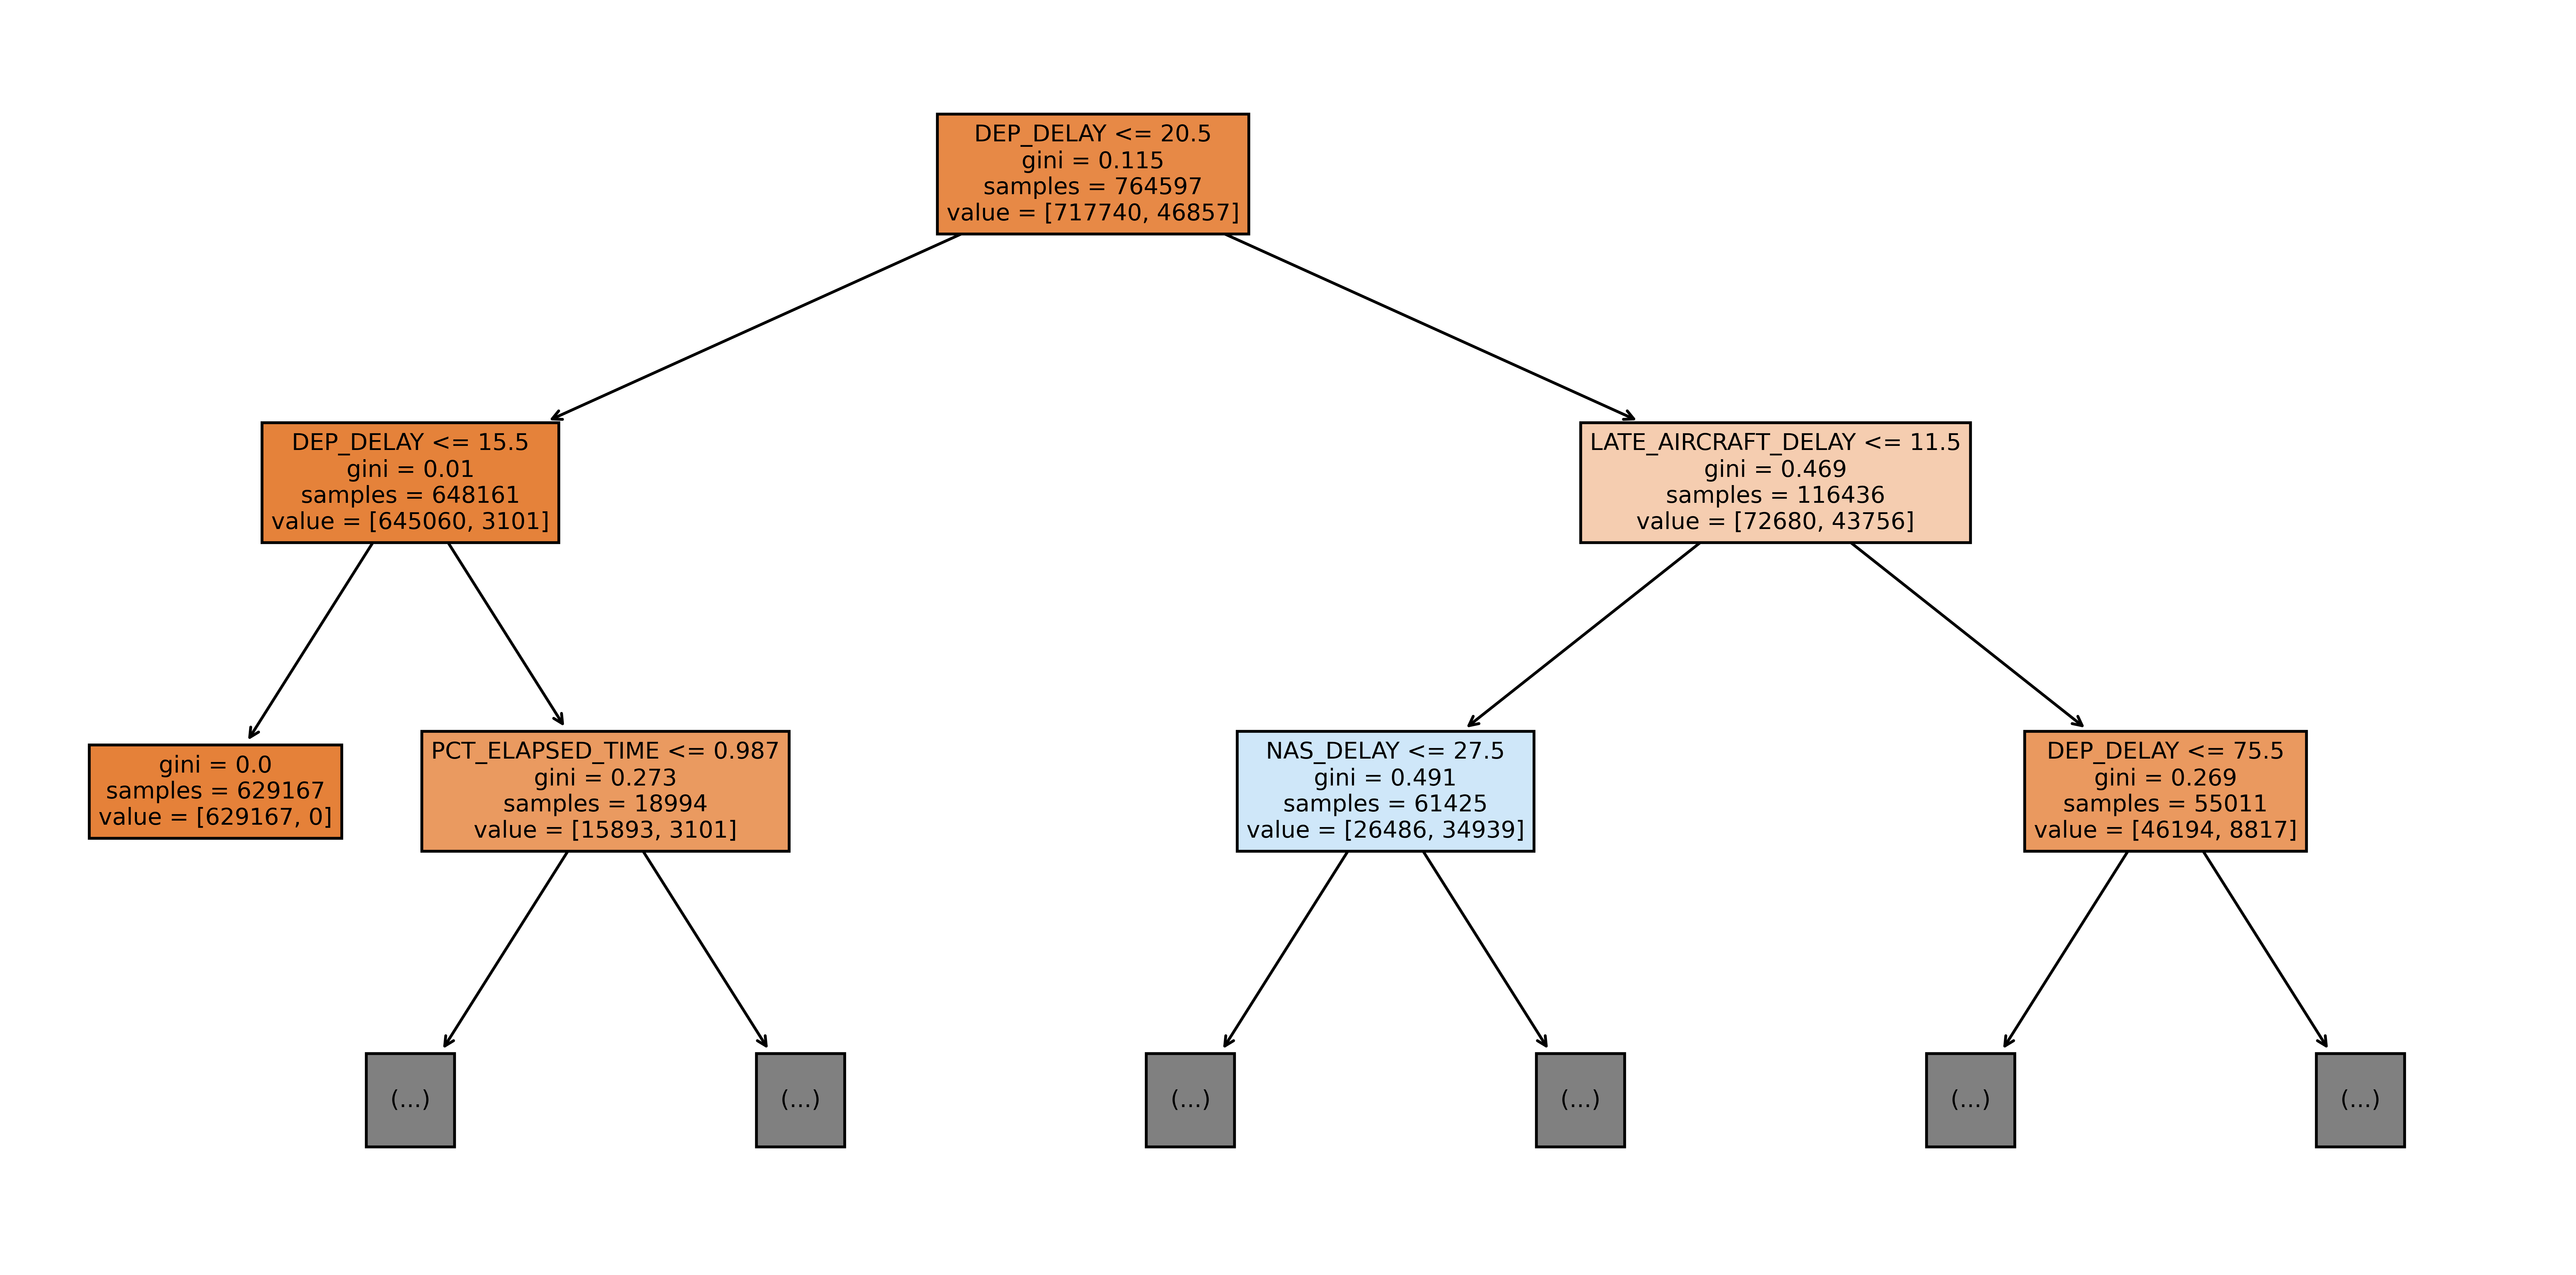

In [49]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16,8), dpi=600)
tree.plot_tree(class_models['decision_tree']['fitted'],\
               feature_names=X_train.columns.values.tolist(), filled = True, max_depth=2)
fig.show()

In [50]:
text_tree = tree.export_text(class_models['decision_tree']['fitted'],\
               feature_names=X_train.columns.values.tolist())
print(text_tree)

|--- DEP_DELAY <= 20.50
|   |--- DEP_DELAY <= 15.50
|   |   |--- class: 0
|   |--- DEP_DELAY >  15.50
|   |   |--- PCT_ELAPSED_TIME <= 0.99
|   |   |   |--- PCT_ELAPSED_TIME <= 0.98
|   |   |   |   |--- PCT_ELAPSED_TIME <= 0.96
|   |   |   |   |   |--- CRS_ELAPSED_TIME <= 65.50
|   |   |   |   |   |   |--- PCT_ELAPSED_TIME <= 0.94
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- PCT_ELAPSED_TIME >  0.94
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- CRS_ELAPSED_TIME >  65.50
|   |   |   |   |   |   |--- PCT_ELAPSED_TIME <= 0.95
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- PCT_ELAPSED_TIME >  0.95
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- PCT_ELAPSED_TIME >  0.96
|   |   |   |   |   |--- CRS_ELAPSED_TIME <= 140.50
|   |   |   |   |   |   |--- DEP_DELAY <= 18.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- DEP_DELAY >  18.50
|   |   |   |   |   |   |   |--- class: 0
|   |   

In [51]:
dt_imp_df = pd.DataFrame({'feature':X_train.columns.values.tolist(),\
                        'importance': class_models['decision_tree']['fitted'].feature_importances_}).\
            sort_values(by='importance', ascending=False)
dt_imp_df

,feature,importance
2,DEP_DELAY,0.527482
16,LATE_AIRCRAFT_DELAY,0.199153
8,PCT_ELAPSED_TIME,0.105381
13,WEATHER_DELAY,0.101649
14,NAS_DELAY,0.062732
15,SECURITY_DELAY,0.001998
9,DISTANCE,0.001019
7,CRS_ELAPSED_TIME,0.000281
5,TAXI_OUT,0.000239
6,WHEELS_OFF,0.000035


### RuleFit

In [52]:
rulefit_df = reg_models['rulefit']['fitted'].get_rules()
rulefit_df = rulefit_df[rulefit_df.coef != 0].sort_values(by="importance", ascending=False)
rulefit_df

,rule,type,coef,support,importance
71,DEP_DELAY > 344.0 & WEATHER_DELAY <= 166.0 & L...,rule,222.059362,0.001684,9.103533
153,DEP_DELAY > 477.5 & LATE_AIRCRAFT_DELAY <= 333.5,rule,177.641477,0.001122,5.947873
16,LATE_AIRCRAFT_DELAY,linear,-0.386192,1.000000,4.525062
2,DEP_DELAY,linear,0.163648,1.000000,4.281465
43,DEP_DELAY > 341.5 & DEP_DELAY <= 788.0 & LATE_...,rule,-92.816845,0.001496,3.587832
...,...,...,...,...,...
150,DEP_DELAY > 58.5 & DEP_DELAY <= 490.5 & LATE_A...,rule,0.123838,0.032735,0.022036
18,DEP_DOW,linear,0.009911,1.000000,0.019806
170,DEP_DELAY <= 534.5 & DEP_DELAY <= 48.5,rule,-0.055177,0.921811,0.014813
162,DEP_DELAY <= 48.5 & DEP_DELAY <= 136.5,rule,-0.027270,0.922933,0.007273


### Nearest Neighbors

#### k-Nearest Neighbors (kNN)

In [53]:
print(X_test.loc[721043,:])

CRS_DEP_TIME            655.000000
DEP_TIME               1055.000000
DEP_DELAY               240.000000
DEP_AFPH                 90.800000
DEP_RFPH                  0.890196
TAXI_OUT                 35.000000
WHEELS_OFF             1130.000000
CRS_ELAPSED_TIME        259.000000
PCT_ELAPSED_TIME          1.084942
DISTANCE               1660.000000
CRS_ARR_TIME            914.000000
ARR_AFPH                 40.434783
ARR_RFPH                  1.064073
WEATHER_DELAY             0.000000
NAS_DELAY                22.000000
SECURITY_DELAY            0.000000
LATE_AIRCRAFT_DELAY     221.000000
DEP_MONTH                10.000000
DEP_DOW                   4.000000
ORIGIN_HUB                1.000000
DEST_HUB                  0.000000
Name: 721043, dtype: float64


In [54]:
print(y_test_class[721043])

1


In [55]:
print(y_test_class[721043])

1


In [56]:
print(class_models['knn']['preds'][X_test.index.get_loc(721043)])

0


In [57]:
print(class_models['knn']['fitted'].kneighbors(X_test.loc[721043,:].values.reshape(1,21), 7))

(array([[143.3160128 , 173.90740076, 192.66705727, 211.57109221,
        243.57211853, 259.61593993, 259.77507391]]), array([[105172, 571912,  73409,  89450,  77474, 705972, 706911]]))


In [58]:
print(y_train_class.iloc[[105172, 571912,  73409,  89450,  77474, 705972, 706911]])

3813      0
229062    1
283316    0
385831    0
581905    1
726784    1
179364    0
Name: CARRIER_DELAY, dtype: int64


In [59]:
print(class_models['knn']['fitted'].effective_metric_)

euclidean


### Naïve Bayes

#### Gaussian Naïve Bayes

In [60]:
print(class_models['naive_bayes']['fitted'].class_prior_)

[0.93871674 0.06128326]


In [61]:
print(class_models['naive_bayes']['fitted'].sigma_)

[[2.50123026e+05 2.61324730e+05 9.21572605e+02 1.26123968e+03
  2.08339528e-01 9.58074414e+01 2.62606651e+05 6.30102550e+03
  1.13475535e-02 4.22470414e+05 2.75433641e+05 1.25314386e+03
  3.48655340e-01 1.11234714e+02 1.91877186e+02 2.80302201e+00
  5.06561612e+02 1.17346654e+01 3.99122491e+00 2.39015406e-01
  2.34996222e-01]
 [2.60629652e+05 2.96009867e+05 1.19307931e+04 1.14839167e+03
  1.99929921e+00 1.20404927e+02 3.08568277e+05 6.29066219e+03
  1.38936741e-02 4.10198938e+05 3.28574000e+05 1.09023147e+03
  3.08997044e+00 7.79140423e+01 1.56184090e+02 9.12112286e-01
  2.11279954e+03 1.02712368e+01 4.02943162e+00 1.77750796e-01
  2.50208354e-01]]


In [62]:
print(class_models['naive_bayes']['fitted'].theta_)

[[1.30740577e+03 1.31006271e+03 5.14196506e+00 5.45864877e+01
  1.09377996e+00 1.87120810e+01 1.33552258e+03 1.70734929e+02
  9.71131781e-01 1.01824369e+03 1.48438931e+03 5.39873058e+01
  1.09644787e+00 7.39971299e-01 2.85434558e+00 2.41814585e-02
  4.14674395e+00 6.55045281e+00 2.95035528e+00 6.06800513e-01
  6.24199571e-01]
 [1.41305545e+03 1.48087887e+03 8.45867640e+01 6.14731036e+01
  1.25429654e+00 1.99378321e+01 1.49409412e+03 1.72229998e+02
  9.83974416e-01 1.04363666e+03 1.54821862e+03 4.26486417e+01
  1.36373798e+00 4.50733082e-01 4.71991378e+00 2.11281132e-02
  1.40744819e+01 6.73367907e+00 3.04251232e+00 7.69575517e-01
  4.85391724e-01]]


## Discovering Newer Interpretable (Glass-box) Models

### Explainable Boosting Machine (EBM)

In [63]:
#Make new abbreviated versions of datasets
feature_samp = ['DEP_DELAY', 'LATE_AIRCRAFT_DELAY', 'PCT_ELAPSED_TIME', 'WEATHER_DELAY',\
                'NAS_DELAY', 'SECURITY_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME']
X_train_abbrev2 = X_train[feature_samp]
X_test_abbrev2 = X_test[feature_samp]
#For sampling among observations
np.random.seed(rand)
sample2_size = 0.1
sample2_idx = np.random.choice(X_train.shape[0], math.ceil(X_train.shape[0]*sample2_size), replace=False)

In [64]:
ebm_mdl = ExplainableBoostingClassifier()
ebm_mdl.fit(X_train_abbrev2.iloc[sample2_idx], y_train_class.iloc[sample2_idx])

ExplainableBoostingClassifier(binning='quantile', early_stopping_rounds=50,
                              early_stopping_tolerance=0.0001,
                              feature_names=['DEP_DELAY', 'LATE_AIRCRAFT_DELAY',
                                             'PCT_ELAPSED_TIME',
                                             'WEATHER_DELAY', 'NAS_DELAY',
                                             'SECURITY_DELAY', 'DISTANCE',
                                             'CRS_ELAPSED_TIME',
                                             'DEP_DELAY x NAS_DELAY',
                                             'LATE_AIRCRAFT_DELAY x '
                                             'PCT_ELAPSED_TIME',
                                             'LATE_AIRCRAFT_DELAY x NAS_DELAY',
                                             'DEP_D...
                                             'continuous', 'continuous',
                                             'interaction', 'interaction',
            

In [65]:
show(ebm_mdl.explain_global())

Cloud environment detected (['colab', 'ipython']): viz integration is still experimental.


In [66]:
ebm_lcl = ebm_mdl.explain_local(X_test_abbrev2.iloc[76:77],\
                                y_test_class[76:77], name='EBM')
show(ebm_lcl)

In [67]:
ebm_perf = ROC(ebm_mdl.predict_proba).\
                            explain_perf(X_test_abbrev2.iloc[sample_idx],\
                                         y_test_class.iloc[sample_idx], name='EBM')
show(ebm_perf)

### Skoped Rules

In [68]:
sr_mdl = SkopeRules(n_estimators=200, precision_min=0.2, recall_min=0.01,\
                    n_jobs=-1, random_state=rand, max_depth=7,\
                    feature_names=X_train_abbrev2.columns)
sr_mdl.fit(X_train_abbrev2.iloc[sample2_idx], y_train_class.iloc[sample2_idx])

SkopeRules(bootstrap=False, bootstrap_features=False,
           feature_names=Index(['DEP_DELAY', 'LATE_AIRCRAFT_DELAY', 'PCT_ELAPSED_TIME', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME'],
      dtype='object'),
           max_depth=7, max_depth_duplication=None, max_features=1.0,
           max_samples=0.8, max_samples_features=1.0, min_samples_split=2,
           n_estimators=200, n_jobs=-1, precision_min=0.2, random_state=9,
           recall_min=0.01, verbose=0)

In [69]:
sr_y_test_prob = sr_mdl.score_top_rules(X_test_abbrev2.iloc[sample_idx])
sr_y_test_pred = np.where(sr_y_test_prob > 0.5, 1, 0)

In [70]:
print(len(sr_mdl.rules_))

1517


In [71]:
print(sr_mdl.rules_[0:5])

[('DEP_DELAY > 39.5 and LATE_AIRCRAFT_DELAY <= 12.5 and WEATHER_DELAY <= 12.0 and NAS_DELAY <= 27.5 and SECURITY_DELAY <= 8.5', (0.959051724137931, 0.4777241009125067, 2)), ('DEP_DELAY > 39.5 and LATE_AIRCRAFT_DELAY <= 12.5 and WEATHER_DELAY <= 12.0 and NAS_DELAY <= 27.5 and SECURITY_DELAY <= 16.5', (0.9590878374516092, 0.4757740862307305, 6)), ('DEP_DELAY > 39.5 and LATE_AIRCRAFT_DELAY <= 11.5 and WEATHER_DELAY <= 12.0 and NAS_DELAY <= 27.5 and SECURITY_DELAY <= 20.5', (0.9598373709847126, 0.4728846642569354, 6)), ('DEP_DELAY > 39.5 and LATE_AIRCRAFT_DELAY <= 12.5 and WEATHER_DELAY <= 12.5 and NAS_DELAY <= 27.5 and SECURITY_DELAY <= 16.5', (0.9569012547735952, 0.4712520150456744, 2)), ('DEP_DELAY > 39.5 and LATE_AIRCRAFT_DELAY <= 11.5 and WEATHER_DELAY <= 12.0 and NAS_DELAY <= 27.5 and SECURITY_DELAY <= 19.0', (0.9589380988822661, 0.4700764303305863, 4))]


In [72]:
print('actual: %s, predicted: %s' % (y_test_class.iloc[76], sr_y_test_pred[76]))

actual: 1, predicted: 0


In [73]:
print(sr_mdl.decision_function(X_test_abbrev2.iloc[76:77]))

[18.23328729]


In [74]:
print('accuracy: %.3g, recall: %.3g, roc auc: %.3g, f1: %.3g, mcc: %.3g' %\
      (metrics.accuracy_score(y_test_class.iloc[sample_idx], sr_y_test_pred),\
       metrics.recall_score(y_test_class.iloc[sample_idx], sr_y_test_pred),\
       metrics.roc_auc_score(y_test_class.iloc[sample_idx], sr_y_test_prob),\
       metrics.f1_score(y_test_class.iloc[sample_idx], sr_y_test_pred),\
       metrics.matthews_corrcoef(y_test_class.iloc[sample_idx], sr_y_test_pred)))

accuracy: 0.961, recall: 0.981, roc auc: 0.984, f1: 0.748, mcc: 0.753
